In [192]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import seaborn as sns

## 回帰分析   

### 回帰分析とは     
**回帰分析(regression analysis)**において回帰という用語を導入したのはSir F.Galtonといわれている。彼は父親と息子の身長の関係を一次式を用いて調べると世代を経ることで平均値へと収束することを見出した。これを平均回帰(regression toward the mean)と称したことにことを発する。この話は次に詳しい。   

+ https://en.wikipedia.org/wiki/Regression_analysis    

回帰分析という呼称は彼の功績に基づいており、現在使われている回帰の意味はこれを拡張したものである。   
   
ここで説明変数が入力として与えられた時に目的変数が出力として現れるものはシステムと呼ばれるが、物理的考察または経験則によりある数式モデルで近似できるものと考えることができる。   
ここでモデルが線形であると仮定出来る時、回帰モデルは次式のように現れれる。   
     
$$
\begin{align}
y &= \boldsymbol{x} \boldsymbol{\beta}^{T}  \\ 
  &= \beta_0 + \beta_{1} x_{1} + \cdots + \beta_{p} x_{p}  
\end{align}
$$

ここに$p$はモデル次数であり、また次ようにおいた     

$$
\boldsymbol{x} = [1 \ x_{1} \ \cdots \ x_{p}] \\
\boldsymbol{\beta} = [\beta_{0} \ \beta_{1} \ \cdots \beta_{p}]
$$  

回帰分析の分野において$\boldsymbol{\beta}$は**偏回帰係数**(partial regression coefficitent)と呼ばれる。    
経済系では$\boldsymbol{\beta}$をベータ係数と称し、特に定数($\beta_{0}$)をバイアスパラメータと称し重要視することがある。このためこの項を抜き出した次のような表現もよく用いられる。   

$$
y = \beta_{0} + \boldsymbol{x} \boldsymbol{\beta}^{T}
$$

モデルが非線形なら次で表す。  

$$
y = f(\boldsymbol{x}, \boldsymbol{\beta})
$$

ここに関数$f(\dot)$の構造(どのような数式で表されるか)は既知とすることが一般的である。   
    
線形・非線形に関わらず、回帰分析とは次を行うことである。   
+ モデル構造が既知と仮定して、モデル次数$p$を選定する。   
+ $\boldsymbol{x}$, yを用いて、偏回帰係数$\boldsymbol{\beta}$を推定し、回帰モデルを求める。   
+ この回帰モデルを用いて、目的変数が未知で新たな説明変数をモデルに入力して目的変数を予測する。

### statsmodels   
`statsmodels`は様々な統計モデルを提供しており、公式HPは<a href = https://www.statsmodels.org>こちら</a>にある。   
本章では回帰モデルのパラメータ推定にOLS法(ordinary least squares)を扱うが他にGLS法(generalized least squares)などがある。   
また`statsmodels`は説明変数を**exog(exogenous variable)**、目的変数を**endog(endogenous variable)**とあわわす。
`statsmodels`の使い方は次を参照すること。
+ <a href = http://www.statsmodels.org/dev/regression.html>線形回帰の説明：Linear Regression</a>    
+ 線形回帰計算結果の説明：statsmodels.regression.linear_model.RegressionResults   
+ OLSの使い方:statsmodels.regression.linear_model.OLS    

### 単回帰分析  
**単回帰分析(simple linear regression)**は$y = \beta_{0} + \beta_{1}x$の1次式を扱う。得られたデータから偏回帰係数を推定してモデルを求め、これを用いて予測を行っていく。   


#### 単回帰分析の意義      
下図において、散布図は何らかの観測によって計測した値をプロットしたものである。この時xは説明変数、yは目的変数である。  
xとyの関係が1次式で表されると仮定して、次の単回帰モデルを導入する。   
$$
y = \beta_{0} + \beta_{1} x
$$
このモデルが観測したデータに最もフィットするように偏回帰係数($\beta_{0}$, $\beta_{1}$)を求める。  

Text(0, 0.5, 'y')

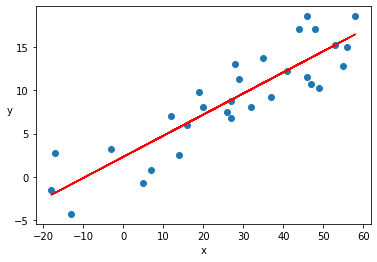

In [193]:
# create random variables, y = 0.25x + 3 + e
np.random.seed(123)
x = np.random.randint(-20, 60, 30).reshape(-1, 1)   # 1d-array is not used for sklearn, so reshape(-1, 1)
y = x * 0.25 + 3 + np.random.randint(-5, 5, 30).reshape(-1, 1)

# creating linear regression model
model = LinearRegression()
model.fit(x, y)

# prediction from linear model
y_pred = model.predict(x)

# scatter plot and regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color = "red")
plt.xlabel("x")
plt.ylabel("y", rotation = 0)

通常は最小2乗法を用いて単回帰モデルを求め、これを直線でプロットしたものが上図である。  
この単回帰モデルは数式(連続値をとり$-\infty$ ~ $\infty$の区間をとる)で表されるため求めることの意義は下のようになる。  
+ 計測データは離散値である。このため、隣り合うデータのyを知りたい場合にこの値をよくすることができる。   
+ この例では$-20 \leq x \leq 60$であるが、この区間を超えたyを予測することができる。   
+ パラメーター$\beta_{0}$, $\beta{1}$を見ることで説明変数に基づく目的変数の発生メカニズムを知ることができる。  

#### 単回帰モデルの統計的評価     
上図において誤差$e$は離散時系列データ$\{ e_i \}$, $(i = 1 \sim N)$であり、確率変数と考えることができる。こうすれば単回帰モデルは確率システムとなりモデルの良し悪しを統計的に評価できる。特に誤差が正規分布に従うと仮定した時の評価指標は理論的に整備されている。   

##### 偏回帰係数のt検定   
単回帰モデルが確率システムという仮定の下、偏回帰係数は確率変数となる。特に係数$\beta_{0}$, $\beta_{1}$の値が0か否かは問題になり次の仮説検定が行われる。   

$H_0$:係数は0である   
$H_1$:係数は0でない   

ここに、係数は$\beta_{0}$または$\beta_{1}$のいずれかを表し、それぞれ別途に検定される。   
各係数の検定には$e_i$の分散を用いるが、この分散は未知であるため標本分散を用いたt検定を行うこととなる。  

#### 決定係数
**決定係数(coefficient of determination)**は$R^2$で表され、回帰モデルのデータに対する当てはまりの指標である。   
これは以下の範囲をとる。   
$$
0 \leq R^2 \leq 1
$$
この式において1に近いほど当てはまりが良いとされ、説明変数が目的変数を良く説明していると言われている。    
ただし、$R^2$は絶対的な指標ではなくあくまでも目安であること考えないといけない。下図の一つ目では$R_{green}^2 \leq R_{red}^2$という結果は妥当であるが、二つ目の図では赤の単回帰モデルの方が良いようにも思える。   
モデルの当てはまりの判断はデータの背景や使用条件にも左右されるのでどちらのモデルが良いかの判断は$R^2$だけでは決められないことが多々ある。    

Text(0, 0.5, 'y')

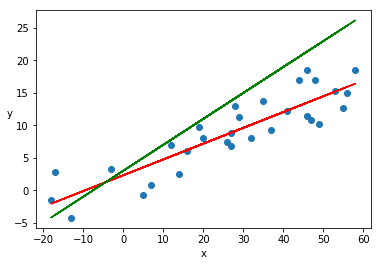

In [55]:
# R^2(red) > R^2(green)はぽい
plt.scatter(x, y)
plt.plot(x, 0.25 * x + 3,, color = "red")
plt.plot(x, 0.4 * x + 3, color = "green")
plt.xlabel("x")
plt.ylabel("y", rotation = 0)

Text(0, 0.5, 'y')

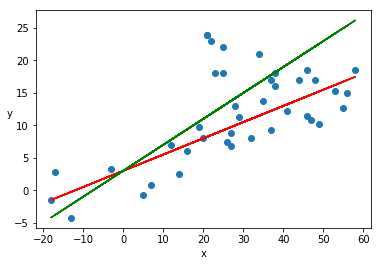

In [63]:
# R^2(green) > R^2(red) ?
# 外れ値に引っ張られてR^2の適切な評価が難しくなっている
x_new = np.insert(x, -1, np.random.randint(20, 40, 10))
y_new = np.insert(y, -1, np.random.randint(15, 25, 10))
plt.scatter(x_new, y_new)
plt.plot(x_new, 0.25 * x_new + 3, color = "red")
plt.plot(x_new, 0.4 * x_new + 3, color = "green")
plt.xlabel("x")
plt.ylabel("y", rotation = 0)

#### 家計調査    
家計調査のWebサイト(総務省統計局)から、2人以上世帯に対して一人あたりの支出とエンゲル係数のそれぞれに対して単回帰分析を行う。   


In [4]:
url = "http://sites.google.com/site/datasciencehiro/datasets/FamilyIncome.csv"
df = pd.read_csv(url, comment = "#")
df.head()

,income,expenditure,engel
0,216,172462,30.8
1,304,204599,29.9
2,356,224776,28.8
3,413,240153,27.8
4,481,255497,27.3


データは上記のようにincome(万円/year), expenditure(円/month), engel(エンゲル係数)の並びである。   
このデータにおいて説明変数をincome, 目的変数をexpenditureとして単回帰分析を行う。   

                            OLS Regression Results                            
Dep. Variable:            expenditure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     624.7
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           7.02e-09
Time:                        20:14:13   Log-Likelihood:                -105.43
No. Observations:                  10   AIC:                             214.9
Df Residuals:                       8   BIC:                             215.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.4e+05   6550.516     21.366      0.0

Text(0, 0.5, 'expenditure')

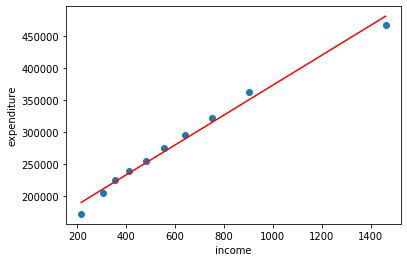

In [119]:
# 今回はR風の表記が可能なstatsmodels.formula.apiを用いる
result = smf.ols("expenditure ~ income", data = df).fit()
# summary table
# kの表記はRの表記に従う(Pasty)
print(result.summary())

# extract parameter
b0, b1 = result.params
# prediction
predict = result.predict(df.income)

# scatter plot and regression line
plt.scatter(df.income, df.expenditure)
plt.plot(df.income, predict, color = "red")
plt.xlabel("income")
plt.ylabel("expenditure")

##### 単回帰モデルを用いた予測   
この図より単回帰モデルが良い指標になると判断するなら、データにはない年間年収1100万円、1200万円家庭の1ヶ月支出が予測できる。   

In [132]:
# making new data frame
new_df = pd.DataFrame({ "income" : [1100, 1200] })

# prediction
result.predict(new_df.income)
# 1100 -> 397198, 1200 -> 420584

0    397198.498402
1    420584.101981
dtype: float64

このグラフでは最低収入と最高収入が大きく外れているため、中間層のみで考えるならこの2セットを外して再度の単回帰分析を行う。  

                            OLS Regression Results                            
Dep. Variable:            expenditure   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2889.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           2.78e-09
Time:                        20:23:14   Log-Likelihood:                -73.085
No. Observations:                   8   AIC:                             150.2
Df Residuals:                       6   BIC:                             150.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.314e+05   2784.282     47.195      0.0

/anaconda3/envs/python_project/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


0    413726.444185
1    439392.167813
dtype: float64

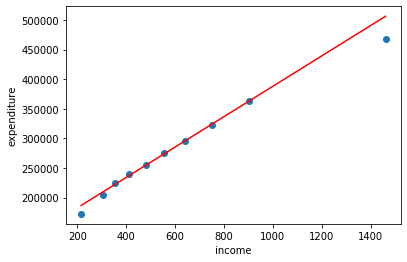

In [134]:
# extract only intermediate levels
df_trim = df[(df.income < df.income.max()) & (df.income > df.income.min())]

# fit linear regression
result_trim = smf.ols("expenditure ~ income", data = df_trim).fit()

# show summary
print(result_trim.summary())

# return prediction
predict_trim = result_trim.predict(df.income)

# show scatter plot and regression line
plt.scatter(df.income, df.expenditure)
plt.plot(df.income, predict_trim, color = "red")
plt.xlabel("income")
plt.ylabel("expenditure")

# prediction from new data
result_trim.predict(new_df.income)
# 1100 -> 413726, 1200 -> 439392

目的変数をエンゲル係数、説明変数を収入とした時は以下のようになる

                            OLS Regression Results                            
Dep. Variable:                  engel   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.88
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           5.54e-05
Time:                        20:25:27   Log-Likelihood:                -13.470
No. Observations:                  10   AIC:                             30.94
Df Residuals:                       8   BIC:                             31.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.0757      0.664     46.781      0.0

Text(0, 0.5, 'engel coeff')

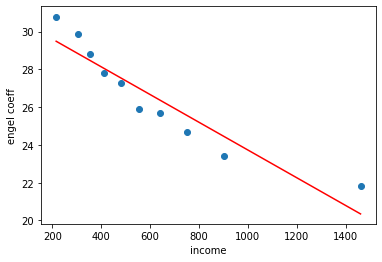

In [136]:
# regression and show summary
result_engel = smf.ols("engel ~ income", data = df).fit()
print(result_engel.summary())

# scatter plot and regression line
predict_engel = result_engel.predict(df.income)

plt.scatter(df.income, df.engel)
plt.plot(df.income, predict_engel, color = "red")
plt.xlabel("income")
plt.ylabel("engel coeff")

#### Simpson's Paradox  
回帰分析を直ちに行うのではなく、その前にデータの可視化も含めていくつかの統計的特徴量を見てから回帰分析を実施し、この事前分析と照合して結果を評価することが望ましい。    
これを怠ると間違いを犯す代表的な例としてSimpton's Paradoxがある。これは母集団の相関と部分集合の相関が異なる時に、部分集団の仮説や統計分析結果が母集団と正反対の結果が出ることを指摘している。以下に詳しい説明がある。    
+ <a href = "https://en.wikipedia.org/wiki/Simpson%27s_paradox">Wikipedia : Simpton's Paradox</a>
+ <a href = "https://doi.org/10.1515/jci-2016-0021">Judea Pearl : Lord's Paradox Revisited (Oh Lord! Kumbaya!), Journal of Causal Inference, 2016</a>

回帰分析を闇雲に行うとおかしな結果になること例として下記の仮想データを考える。   
勉強時間(study_time)とテストの点(test_score)のデータセットであるが、今回はテストスコアと勉強時間は係数2.5の正の相関関係を持たしているが、勉強時間が少なくても高い点数が取れるグループ(education = high)とそうでないグループ(education = low)にわけ、前者のグループが優位にテスト勉強をしていなかったというセッティングである。   

In [188]:
np.random.seed(123)

# 優秀グループは勉強時間が少ないが取れる点数が高い。
study_time_high = np.round(np.random.normal(loc = 2, scale = 1, size = 50), 0) 
test_score_high =  study_time_high * 2.5 + np.random.normal(loc = 70, scale = 5, size = 50)

# 優秀でないグループはたくさん勉強するが点数が低い。
study_time_low = np.round(np.random.normal(loc = 5, scale = 1, size = 50), 0)
test_score_low = study_time_low * 2.5 + np.random.normal(loc = 50, scale = 5, size = 50)

# 各グループのデータセットを作成し、結合する。
df_high = pd.DataFrame( {"study_time" : study_time_high, 
                                       "test_score" : test_score_high, 
                                       "education" : "high"} )

df_low = pd.DataFrame( {"study_time" : study_time_low, 
                                      "test_score" : test_score_low, 
                                      "education" : "low"} )

df_full = pd.concat([df_high, df_low])
df_full.head()


,study_time,test_score,education
0,1.0,66.029573,high
1,3.0,72.306059,high
2,2.0,83.718561,high
3,0.0,66.009686,high
4,1.0,72.648416,high


In [189]:
# データ全体で単線計回帰
lm_full = smf.ols("test_score ~ study_time", data = df_full).fit()
print(lm_full.summary())

# coef = -1.985, p-val = 0.000 優位に負の相関？！

                            OLS Regression Results                            
Dep. Variable:             test_score   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     25.63
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           1.94e-06
Time:                        21:28:36   Log-Likelihood:                -344.64
No. Observations:                 100   AIC:                             693.3
Df Residuals:                      98   BIC:                             698.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.5838      1.586     47.658      0.0

In [190]:
# グループわけして線形回帰
lm_high = smf.ols("test_score ~ study_time", data = df_high).fit()
print(lm_high.summary())

# coef = 2, p-val = 0.001 シュミレーションの内容に近い

                            OLS Regression Results                            
Dep. Variable:             test_score   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     12.94
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           0.000759
Time:                        21:29:47   Log-Likelihood:                -154.45
No. Observations:                  50   AIC:                             312.9
Df Residuals:                      48   BIC:                             316.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.5336      1.484     47.524      0.0

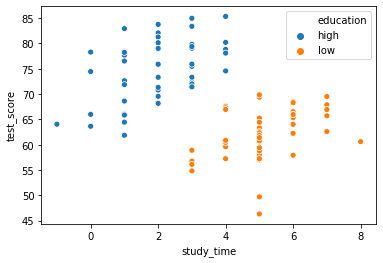

In [191]:
# 散布図をかくと異なる2グループを混ぜて考えたせいで見かけ上の負の相関ができたことが明らか
sns.scatterplot(x = "study_time", y = "test_score", hue = "education", data = df_full)

#### 数学的説明   
はじめに次の事を設定する。    
**取得データ** $\{ x_{i}, y_{i} \}  \ (i = 1, \cdots, N)$   
**真のシステム** $y_{i} = \beta_0 + \beta_1 x_i + \epsilon_i, \ \ \  \epsilon_i \sim N(0, \sigma^2)$    
**回帰モデル** $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} x_i$   
**$x$, $y$の標本平均** $\hat{\mu_x}, \hat{\mu_y}$ 